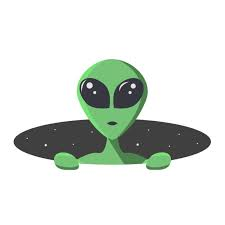

<p style="text-align: center; font-size: 30px;"><b>Alienbot</b></p>

# **Project Overview: AlienBot Chatbot**

The **AlienBot** project focuses on designing and implementing a rule-based chatbot that simulates a simple conversation between a human and an alien visitor named *Etcetera*. The goal of the project is to build a functional conversational system with structured logic, pattern matching, and dynamic responses.

## **Project Objectives**

* **Create a conversational entry point**
  Implement a greeting flow where the chatbot introduces itself, asks for the user’s name, and determines whether the conversation should proceed.

* **Build a continuous interaction loop**
  Develop a mechanism that keeps the dialogue active until the user issues an exit command.

* **Implement exit detection**
  Add a system that identifies phrases indicating the user wants to stop the conversation and gracefully ends the session.

* **Match user inputs to defined intents**
  Use regular expressions to interpret the user’s replies and map them to specific conversational intents.

* **Develop multiple response behaviors**
  Implement intent-specific methods — such as describing the alien’s planet, explaining why the alien is visiting, and performing a cube calculation based on user input.

* **Handle unrecognized input**
  Create a fallback response system to ensure the chatbot can reply appropriately even when no intent matches.

* **Ensure modularity and extensibility**
  Structure the code so that new intents, patterns, or behaviors can be added without altering the core chatbot logic.

## **End Result**

By completing this project, you will have a fully operational, rule-based chatbot capable of:

* greeting the user,
* carrying out a multi-step conversation,
* recognizing and responding to specific intents,
* handling unexpected input, and
* terminating the conversation smoothly.

This project serves as a foundation for more advanced chatbot systems and can be extended with additional intents, improved pattern matching, or more sophisticated dialogue logic.

---

If you'd like, I can now generate a **Closing Summary Markdown** or a **Project Architecture Diagram**.


In [1]:
# importing regex and random libraries
import re
import random

In [28]:
class AlienBot:
# potential negative responses
  negative_responses = ("no", "nope", "nah", "naw", "not a chance", "sorry")
  # keywords for exiting the conversation
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later")
  # random starter questions
  random_questions = (
        "Why are you here? ",
        "Are there many humans like you? ",
        "What do you consume for sustenance? ",
        "Is there intelligent life on this planet? ",
        "Does Earth have a leader? ",
        "What planets have you visited? ",
        "What technology do you have on this planet? "
    )
    def __init__(self):
    self.alienbabble = {'describe_planet_intent': r'',
                        'answer_why_intent': r'',
                        'cubed_intent': r''
                            }

IndentationError: unexpected indent (444067027.py, line 16)

# **Developing the `greet()` Function**

## **Tasks 1–5**

**1.** Inside `.greet()`, ask the user for their name using `input()` and save it to `self.name`.

**2.** Create a `will_help` variable with the user’s response to:
*"Hi NAME, I'm Etcetera. I'm not from this planet. Will you help me learn about your planet?"*

**3.** Check whether `will_help` is in `self.negative_responses`.
If yes:

* Print: *“Ok, have a nice Earth day!”*
* Return from `.greet()`

**4.** If the user does not respond negatively, call `self.chat()`.

**5.** Test `.greet()` by:

* Creating an instance: `my_bot = AlienBot()`
* Calling `my_bot.greet()`
* Verifying both conversation flows (user says “yes” or “no”)


In [36]:
# Define .greet() below:
def greet(self):
    self.name = input("Hello there, What is your name? ")
    will_help = input(f"Hi {self.name}, I'm Etcetera. I'm not from this planet. Will you help me learn about your planet? ")
    if will_help in self.negative_responses:
        print("Ok, have a nice Earth day!")
        return
    self.chat()
    return

# **Developing Conversation Handling (`chat()` and `make_exit()`)**

## **Tasks 6–10**

**6.** In `.chat()`, ask the user a random question using:

```python
reply = input(random.choice(self.random_questions)).lower()
```

**7.** Begin implementing `.make_exit()` by looping over `self.exit_commands`.

**8.** Inside the loop:

* Check whether the exit command is in `reply`
* If yes:

  * Print: *“Ok, have a nice Earth day!”*
  * Return `True`

**9.** In `.chat()`:

* Add a `while` loop that runs while `not self.make_exit(reply)`
* Inside the loop, ask:

```python
reply = input("How are you? ")
```

**10.** Test the conversation loop by running `python3 script.py` and reproducing the example dialogue.

---


In [37]:
  # Define .make_exit() here:
  def make_exit(self, reply):
    for word in self.exit_commands:
        if word in reply:
            print("Ok, have a nice Earth day!")
            return True

  # Define .chat() next:
  def chat(self):
    reply = input(random.choice(self.random_questions)).lower()
    while not self.make_exit(reply):
        reply = input(self.match_reply(reply))

# **Developing Intent Matching (`match_reply()`)**

## **Tasks 11–13**

**11.** Inside `.chat()`, replace the prompt `"How are you?"` with a call to `self.match_reply(reply)`:

```python
reply = input(self.match_reply(reply))
```

(This stays inside the `while` loop.)

**12.** In `.match_reply()`, loop through `self.alienbabble.items()` and for each pair:

* Store the key in `intent`
* Store the value in `regex_pattern`

**13.** For each pattern, check if it matches the user’s reply using:

```python
found_match = re.match(regex_pattern, reply)
```

In [38]:
# Define .match_reply() below:
def match_reply(self, reply):
    for intent, regex_pattern in self.alienbabble.items():
      found_match = re.match(regex_pattern, reply)
      if found_match and intent == "describe_planet_intent":
        return self.describe_planet_intent()
      elif found_match and intent == "answer_why_intent":
        return self.answer_why_intent()
      elif found_match and intent == "cubed_intent":
        return self.cubed_intent(found_match.groups()[0])
      else:
        return self.no_match_intent()

# **Developing the `describe_planet_intent` Intent**

## **Tasks 14–18**

**14.** After computing `found_match` in `.match_reply()`, add an `if` condition:

```python
if found_match and intent == 'describe_planet_intent':
    return self.describe_planet_intent()
```

**15.** In the `AlienBot` constructor, add a regular expression for `'describe_planet_intent'` in `self.alienbabble` that matches:

* “Can you tell me about your planet?”
* “I am interested in your planet.”

Example entry:

```python
self.alienbabble = {
    'describe_planet_intent': r'.*\s*your planet.*',
    'answer_why_intent': r'',
    'cubed_intent': r'',
    'unsure_response_intent': r''
}
```

**16.** Run `python3 script.py` and test that a message like *“tell me about your planet”* triggers the intent and prints the debug message (e.g. “Inside describe_planet_intent”).

**17.** In `.describe_planet_intent()`, delete the placeholder return and create:

```python
responses = (
    "My planet is a utopia of diverse organisms and species. ",
    "I am from Opidipus, the capital of the Wayward Galaxies. "
)
```

**18.** Return a random response using:

```python
return random.choice(responses)
```


In [39]:
class AlienBot:
  # potential negative responses
  negative_responses = ("no", "nope", "nah", "naw", "not a chance", "sorry")
  # keywords for exiting the conversation
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later")
  # random starter questions
  random_questions = (
        "Why are you here? ",
        "Are there many humans like you? ",
        "What do you consume for sustenance? ",
        "Is there intelligent life on this planet? ",
        "Does Earth have a leader? ",
        "What planets have you visited? ",
        "What technology do you have on this planet? "
    )

  def __init__(self):
    self.alienbabble = {'describe_planet_intent': r'.*\s*your planet.*',
                        'answer_why_intent': r'why\sare.*',
                        'cubed_intent': r'.*cube.*(\d+)'
                            }


In [40]:
# Define .describe_planet_intent():
def describe_planet_intent(self):
    responses = ("My planet is a utopia of diverse organisms and species.", "I am from Opidipus, the capital of the Wayward Galaxies. ")
    return random.choice(responses)

<p style="font-size: 16px;"><b>Task 5</b></p>
Let’s test .greet() out! At the bottom of script.py, outside of the AlienBot class, create an instance of the AlienBot class. Then call the .greet() method. In the terminal, enter python3 script.py and test both scenarios: one where the user agrees to have a conversation and one where the user declines.

In [41]:
class AlienBot:
  # potential negative responses
  negative_responses = ("no", "nope", "nah", "naw", "not a chance", "sorry")
  # keywords for exiting the conversation
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later")
  # random starter questions
  random_questions = (
        "Why are you here? ",
        "Are there many humans like you? ",
        "What do you consume for sustenance? ",
        "Is there intelligent life on this planet? ",
        "Does Earth have a leader? ",
        "What planets have you visited? ",
        "What technology do you have on this planet? "
    )

  def __init__(self):
    self.alienbabble = {'describe_planet_intent': r'.*\s*your planet.*',
                        'answer_why_intent': r'why\sare.*',
                        'cubed_intent': r'.*cube.*(\d+)'
                            }


In [42]:
def answer_why_intent(self):
    responses = ("I come in peace. ", "I am here to collect data on your planet and its inhabitants. ", "I heard the coffee is good. ")
    return random.choice(responses)

# **Developing the `cubed_intent` Intent**

## **Tasks 24–27**

**24.** In `.match_reply()`, under the previous `elif` blocks, add:

```python
elif found_match and intent == 'cubed_intent':
    return self.cubed_intent(found_match.group(1))
```

Here, `found_match.group(1)` should contain the number the user wants cubed.

**25.** In the `AlienBot` constructor, add a regex for `'cubed_intent'` in `self.alienbabble` that matches:

* “Can you cube the number 3?”

and does **not** match the other example sentences. For example:

```python
'cubed_intent': r'.*cube.*(\d+)'
```

**26.** Run `python3 script.py` and test that an input such as *“can you cube the number 5?”* triggers the intent and prints the debug message (e.g. “Inside cubed_intent”).

**27.** In `.cubed_intent(number)`, implement the following logic:

```python
number = int(number)
cubed_number = number * number * number
return f"The cube of {number} is {cubed_number}. Isn't that cool?"
```


In [43]:
class AlienBot:
  # potential negative responses
  negative_responses = ("no", "nope", "nah", "naw", "not a chance", "sorry")
  # keywords for exiting the conversation
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later")
  # random starter questions
  random_questions = (
        "Why are you here? ",
        "Are there many humans like you? ",
        "What do you consume for sustenance? ",
        "Is there intelligent life on this planet? ",
        "Does Earth have a leader? ",
        "What planets have you visited? ",
        "What technology do you have on this planet? "
    )

  def __init__(self):
    self.alienbabble = {'describe_planet_intent': r'.*\s*your planet.*',
                        'answer_why_intent': r'why\sare.*',
                        'cubed_intent': r'.*cube.*(\d+)'
                            }


In [44]:
# Define .cubed_intent():
def cubed_intent(self, number):
    print(number)
    number = int(number)
    cubed_number = number * number * number
    return f"The cube of {number} is {cubed_number}. Isn't that cool? "

# **Developing the Fallback Intent and Completing the Chatbot**

### **Handling Responses That Don't Match an Intent (`no_match_intent`) – Tasks 28–30**

**28.** In `.match_reply()`, after the last `elif` block, add a final `else`:

```python
else:
    return self.no_match_intent()
```

**29.** In `.no_match_intent()`, create a tuple of generic responses and save it as `responses`, for example:

```python
responses = (
    "Please tell me more. ",
    "Tell me more! ",
    "Why do you say that? ",
    "I see. Can you elaborate? ",
    "Interesting. Can you tell me more? ",
    "I see. How do you think? ",
    "Why? ",
    "How do you think I feel when you say that? "
)
```

**30.** Return a random response from this tuple:

```python
return random.choice(responses)
```


In [47]:
def no_match_intent(self):
    responses = ("Please tell me more. ", "Tell me more! ", "Why do you say that? ", "I see. Can you elaborate? ", "Interesting. Can you tell me more? ", "I see. How do you think? ", "Why? ", "How do you think I feel when you say that? ")
    return random.choice(responses)

# Final result

-

## **Project Completion – Task 31**

**31.** You now have a complete rule-based chatbot with:

* A greeting flow via `.greet()`
* A conversation loop in `.chat()`
* Exit handling in `.make_exit()`
* Intent detection with regex in `.match_reply()`
* Specific intents:

  * `describe_planet_intent`
  * `answer_why_intent`
  * `cubed_intent`
* A generic fallback via `.no_match_intent()`

You can extend the chatbot by:

* Adding more keys and regex patterns in `self.alienbabble`
* Defining new intent methods and hooking them into `.match_reply()`
* Refining regex patterns for more natural language inputs

This forms a solid foundation for more advanced, human-like chatbots.


In [50]:
class AlienBot:
  # potential negative responses
  negative_responses = ("no", "nope", "nah", "naw", "not a chance", "sorry")
  # keywords for exiting the conversation
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later")
  # random starter questions
  random_questions = (
        "Why are you here? ",
        "Are there many humans like you? ",
        "What do you consume for sustenance? ",
        "Is there intelligent life on this planet? ",
        "Does Earth have a leader? ",
        "What planets have you visited? ",
        "What technology do you have on this planet? "
    )

  def __init__(self):
    self.alienbabble = {'describe_planet_intent': r'.*\s*your planet.*',
                        'answer_why_intent': r'why\sare.*',
                        'cubed_intent': r'.*cube.*(\d+)'
                            }

  # Define .greet() below:
  def greet(self):
    self.name = input("Hello there, What is your name? ")
    will_help = input(f"Hi {self.name}, I'm Etcetera. I'm not from this planet. Will you help me learn about your planet? ")
    if will_help in self.negative_responses:
        print("Ok, have a nice Earth day!")
        return
    self.chat()
    return

  # Define .make_exit() here:
  def make_exit(self, reply):
    for word in self.exit_commands:
        if word in reply:
            print("Ok, have a nice Earth day!")
            return True

  # Define .chat() next:
  def chat(self):
    reply = input(random.choice(self.random_questions)).lower()
    while not self.make_exit(reply):
        reply = input(self.match_reply(reply))

  # Define .match_reply() below:
  def match_reply(self, reply):
    for intent, regex_pattern in self.alienbabble.items():
      found_match = re.match(regex_pattern, reply)
      if found_match and intent == "describe_planet_intent":
        return self.describe_planet_intent()
      elif found_match and intent == "answer_why_intent":
        return self.answer_why_intent()
      elif found_match and intent == "cubed_intent":
        return self.cubed_intent(found_match.groups()[0])
      else:
        return self.no_match_intent()


  # Define .describe_planet_intent():
  def describe_planet_intent(self):
    responses = ("My planet is a utopia of diverse organisms and species.", "I am from Opidipus, the capital of the Wayward Galaxies. ")
    return random.choice(responses)

  # Define .answer_why_intent():
  def answer_why_intent(self):
    responses = ("I come in peace. ", "I am here to collect data on your planet and its inhabitants. ", "I heard the coffee is good. ")
    return random.choice(responses)
       
  # Define .cubed_intent():
  def cubed_intent(self, number):
    print(number)
    number = int(number)
    cubed_number = number * number * number
    return f"The cube of {number} is {cubed_number}. Isn't that cool? "

  # Define .no_match_intent():
  def no_match_intent(self):
    responses = ("Please tell me more. ", "Tell me more! ", "Why do you say that? ", "I see. Can you elaborate? ", "Interesting. Can you tell me more? ", "I see. How do you think? ", "Why? ", "How do you think I feel when you say that? ")
    return random.choice(responses)

# Create an instance of AlienBot below:
instance = AlienBot()
instance.greet()


Hello there, What is your name? t
Hi t, I'm Etcetera. I'm not from this planet. Will you help me learn about your planet? yes
Is there intelligent life on this planet? yes
I see. Can you elaborate? why are you here?
Why? exit
Ok, have a nice Earth day!
